# 1. Lý thuyết

**1) Để khởi tạo model trong pytorch chúng ta sử dụng class nào?**

A. nn.Module

B. nn.Dense

C. nn.optim.Adam

D. nn.Dropout

**2) Để khởi tạo mạng neural network trong pytorch chúng ta cần làm gì ?**

A. Kế thừa lại class `nn.Model`. Khởi tạo các layers trong hàm tạo `__init__()` và sử dụng các layers để tính toán dữ liệu trong hàm `forward()`.

B. Khởi tạo một object của class `nn.Model` và sử dụng hàm `add()` để thêm từng layer vào mô hình.

C. Sử dụng class `nn.Model` để khởi tạo mô hình. Truyền vào bên trong class này một list gồm các layers.

D. Kế thừa lại class `nn.Module`. Khởi tạo các layers trong hàm tạo `__init__()` và sử dụng các layers để tính toán dữ liệu trong hàm `forward()`.


**3) Các modules chính trong pytorch dùng để xây dựng và huấn luyện model.**

A. `torch.nn`: Dùng để khởi tạo các layers và activations function và loss function, `torch.optim`: Khởi tạo optimizer, `torch.data`: Khởi tạo dataset và dataloader.

B. `torch.nn`: Dùng để khởi tạo các layers và activations function và loss function, `torch.optim`: Khởi tạo optimizer, `torch.utils.data`: Khởi tạo dataset và dataloader.

C. `torch.nn`: Dùng để khởi tạo các layers và activations function, `torch.optim`: Khởi tạo optimizer, `torch.data`: Khởi tạo dataset và dataloader, `torch.loss`: Khởi tạo loss function.

D. `torch.nn`: Dùng để khởi tạo các layers và loss function, `torch.optim`: Khởi tạo optimizer, `torch.data`: Khởi tạo dataset và dataloader, `torch.activations`: Khởi tạo activations function.


**4) Để customize một Dataset trên pytorch chúng ta cần thực hiện như thế nào?**

A. Sử dụng thuộc tính `transformer` để qui định các biến đổi trên dữ liệu. Những biến đổi này được thực hiện trên hàm tạo.

B. Khởi tạo một class kế thừa lại `torch.utils.data.Dataset`. Khai báo các thuộc tính cần sử dụng trong hàm tạo của dataset như list đường dẫn, list label. Override lại hàm `__getitem__()` để thực hiện các xử lý trên dữ liệu.

C. Kế thừa lại một class `Dataset`. Các điều chỉnh trên dữ liệu được thực hiện trên hàm `transformer()`.

D. Sử dụng hàm `__getitem__()` để trả về toàn bộ các quan sát khi huấn luyện. 

**5) Ý nghĩa của tham số epochs và batch_size trong huấn luyện mô hình là gì?**

A. epochs là kích thước của một mini-batch, batch_size là số lượt lặp lại toàn bộ dữ liệu khi huấn luyện.

B. epochs là số lượt lặp lại toàn bộ dữ liệu validation khi huấn luyện, batch_size là kích thước của một mini-batch.

C. epochs là số lượt lặp lại toàn bộ dữ liệu train khi huấn luyện, batch_size là kích thước của một mini-batch.

D. epochs là số lượng vòng lặp, mỗi vòng lặp là một lượt fit mini-batch, trên bộ dữ liệu khi huấn luyện; batch_size là kích thước của một mini-batch.

+ Câu 1: **A**
+ Câu 2: **D**
+ Câu 3: **B** 
+ Câu 4: **B**
+ Câu 5: **C**

# 2. Thực hành

6) Khởi tạo một tensor 3 chiều với định dạng là float và kích thước là 32x32x3

7) Nếu coi tensor trên là một bức ảnh RGB với số channel là 3 ở cuối. Hãy truy suất các ma trận ảnh tương ứng với mỗi kênh R, G, B.

8) Thực hiện tích hadamard và tích thông thường giữa ma trận R và G.

9) Từ bộ dữ liệu [Income-Classification](https://www.kaggle.com/t/090688c8d33a40b68be9e271d6ba6bae) hãy chuẩn hóa dữ liệu và phân chia tập train/test theo tỷ lệ 80/20. 

10) Xây dựng một mạng deep-neural-network để huấn luyện mô hình trên dữ liệu train và đánh giá mô hình trên dữ liệu test.


In [ ]:
import torch.nn as nn
import torch

+ Câu 6

In [ ]:
tensor_3d = torch.randn((32, 32, 3))
tensor_3d.size()

torch.Size([32, 32, 3])

+ Câu 7

In [ ]:
channel_R = tensor_3d[:, :, 0]
channel_G = tensor_3d[:, :, 1]
channel_B = tensor_3d[:, :, 2]

+ Câu 8

In [ ]:
hadamard = channel_R * channel_G
print(hadamard.size())
mtrix_mul = channel_R @ channel_G
print(mtrix_mul.size())

torch.Size([32, 32])
torch.Size([32, 32])


+ Câu 9,10

In [ ]:
import os
import pandas as pd
import torch.utils.data as td
import torch
import torch.nn as nn
import category_encoders as ce
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

torch.manual_seed(42)

In [ ]:
df = pd.read_csv('train.csv')

### Feature engineering

In [ ]:
# Xử lý outlier

def find_boxplot_boundaries(feature, whisker_coeff=1.5):
    Q1 = feature.quantile(0.25)
    Q3 = feature.quantile(0.75)
    
    IQR = Q3 - Q1
    lower = Q1 - IQR * whisker_coeff
    upper = Q3 + IQR * whisker_coeff
    
    return lower, upper


class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    
    def __init__(self, whisker_coeff=1.5):
        self.whisker_coeff = whisker_coeff
        self.lower = None
        self.upper = None
    
    def fit(self, feature: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(feature)
        return self
    
    def transform(self, feature):
        return feature.clip(self.lower, self.upper)
    
    
df['final_weight'] = BoxplotOutlierClipper().fit_transform(df['final_weight'])
df['hrs_per_week'] = BoxplotOutlierClipper().fit_transform(df['hrs_per_week'])
df['total_education_yrs'] = BoxplotOutlierClipper().fit_transform(df['total_education_yrs'])

In [ ]:
# Những quốc gia có số lượng ít hơn 100 chuyển thành other
def convert_nationality(x):
    if x=='US':
        return x
    elif x=='Mexico':
        return x
    elif x=='?':
        return x
    elif x=='Philippines':
        return x
    elif x=='Germany':
        return x
    else:
        return 'other'

In [ ]:
# xóa bỏ những giá trị có captital gain từ 40000 tới 100000 (chính là giá trị 99999)
df = df[~(df['capital_gain'] >= 40000) & (df['capital_gain'] <= 100000)]

In [ ]:
def fe(X_train, X_val, index_scaler):
    cols = df.select_dtypes(include='object')
    onehot = ce.OneHotEncoder(cols)
    X_train = onehot.fit_transform(X_train)
    X_val = onehot.transform(X_val)
    
    scaler_list = [StandardScaler(), MinMaxScaler()]
    scaler = scaler_list[index_scaler]
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    
    return X_train, X_val    

### Chia và chuẩn bị dữ liệu

In [ ]:
df_new = df.sample(frac=1, ignore_index=True, random_state=42)

X = df_new.drop(['ID', 'target_income'], axis=1)
y = df_new['target_income']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val = fe(X_train, X_val, index_scaler=1)

In [ ]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train.values).long()
train_ds = td.TensorDataset(X_train, y_train)
train_loader = td.DataLoader(train_ds, batch_size=32, shuffle=True, num_workers=1)

X_val = torch.tensor(X_val).float()
y_val = torch.tensor(y_val.values).long()
val_ds = td.TensorDataset(X_val, y_val)
val_loader = td.DataLoader(val_ds, batch_size=32, num_workers=1)

### Xây dựng model

In [ ]:
class MyModel(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train.size()[1], 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 10)
        self.fc4 = nn.Linear(10, 2)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x

model = MyModel()
model

MyModel(
  (fc1): Linear(in_features=108, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
  (fc4): Linear(in_features=10, out_features=2, bias=True)
)

### Train model

In [ ]:
def train(model, data_loader, optimizer):
    model.train()
    losses = 0
    for batch, tensor in enumerate(data_loader):
        data, target = tensor
        optimizer.zero_grad()
        out = model(data)
        loss = loss_criteria(out, target)
        losses += loss.item()
        loss.backward()
        optimizer.step()
        
    avg_loss = losses / (batch + 1)
    print(f"Loss in train set: {avg_loss:.6f}")
    return avg_loss


def val(model, data_loader):
    model.eval()
    correct = 0
    losses = 0
    with torch.no_grad():
        for batch, tensor in enumerate(data_loader):
            data, target = tensor
            out = model(data)
            loss = loss_criteria(out, target)
            losses += loss
            _, predicted = torch.max(out.data, axis=1)
            correct += torch.sum(predicted==target).item()
    
    avg_loss = losses / (batch + 1)
    acc = correct * 100 / len(y_val)
    print(f"Loss in validation set: {avg_loss:.6f}, Accuracy {correct}/{len(y_val)}-{acc:.3f}%")
    print('-'*50)
    return avg_loss, acc


LEARNING_RATE = 0.01
loss_criteria = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
optimizer.zero_grad()
epochs = 50
max_acc = -float('inf')
error_going_up = 0
epoch_nums = 0

for epoch in range(1, epochs+1):
    epoch_nums += 1
    print(f'Epoch {epoch}')
    train_loss = train(model, train_loader, optimizer)
    val_loss, acc = val(model, val_loader)
    
    if acc > max_acc:
        max_acc = acc
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 10:
            break
print(f"Accuracy: {max_acc}")

Epoch 1
Loss in train set: 0.473182
Loss in validation set: 0.457065, Accuracy 4183/4977-84.047%
--------------------------------------------------
Epoch 2
Loss in train set: 0.457647
Loss in validation set: 0.455180, Accuracy 4255/4977-85.493%
--------------------------------------------------
Epoch 3
Loss in train set: 0.455967
Loss in validation set: 0.459345, Accuracy 4192/4977-84.227%
--------------------------------------------------
Epoch 4
Loss in train set: 0.455345
Loss in validation set: 0.450862, Accuracy 4225/4977-84.890%
--------------------------------------------------
Epoch 5
Loss in train set: 0.452593
Loss in validation set: 0.453083, Accuracy 4230/4977-84.991%
--------------------------------------------------
Epoch 6
Loss in train set: 0.453577
Loss in validation set: 0.453464, Accuracy 4229/4977-84.971%
--------------------------------------------------
Epoch 7
Loss in train set: 0.453229
Loss in validation set: 0.457333, Accuracy 4241/4977-85.212%
---------------

### Đánh giá hiệu quả của model

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      3803
           1       0.71      0.60      0.65      1174

    accuracy                           0.85      4977
   macro avg       0.80      0.76      0.78      4977
weighted avg       0.84      0.85      0.84      4977



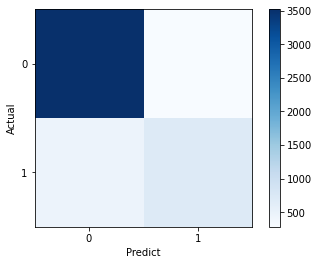

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

model.eval()

_, predicted = torch.max(model(X_val).data, 1)

cm = confusion_matrix(y_val, predicted.numpy())
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, [0, 1])
plt.yticks(tick_marks, [0, 1])
plt.xlabel("Predict")
plt.ylabel("Actual")
print(classification_report(y_val, predicted.numpy()))

### Lưu model

In [ ]:
model_file = 'models/homework3.pt'
torch.save(model.state_dict(), model_file)
del model

In [ ]:
os.listdir('./models')

['homework3', 'homework3.pt']

In [ ]:
retrained = MyModel()
retrained.load_state_dict(torch.load(model_file))

<All keys matched successfully>